# K-means

In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris, make_blobs, make_regression, make_friedman1
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
# using seaborn style (type plt.style.available to see available styles)
plt.style.use("seaborn-dark") 

### Produce synthetic data

Get some synthetic data using the *make_blobs* function using $k=3$ clusters. The dataset consists of $\text{n_samples}=100$ observations and, for simplicity, just $\text{n_features}=2$ features.

In [5]:
nclust    = 3
nsamples  = 100
nfeatures = 2
X, y = make_blobs(n_samples = nsamples, n_features = nfeatures, centers = nclust, cluster_std = 1.2, random_state = 11)

Here, $X$ is a nsamples-by-nfeatures matrix and $y$ is a 1-by-nsamples vector of labels:

In [6]:
print('X (first 5 rows):')
print(X[:5,:])
print('\ny:',y)

X (first 5 rows):
[[-6.28783306 -9.53408918]
 [-1.18654378 -0.12553018]
 [-2.09030275  4.51907484]
 [-0.46938816 -1.10148237]
 [-7.03856146 -9.23201197]]

y: [0 2 1 2 0 1 0 1 1 0 2 2 0 2 0 0 0 0 1 0 2 2 2 0 0 2 1 0 1 1 0 2 2 2 0 1 0
 2 1 0 0 0 2 2 2 1 2 2 1 1 1 0 1 1 2 1 1 1 2 2 0 0 1 1 0 2 2 0 1 0 2 0 0 0
 2 1 2 0 1 0 2 0 0 0 2 2 2 1 1 1 1 1 1 2 1 2 0 2 1 1]


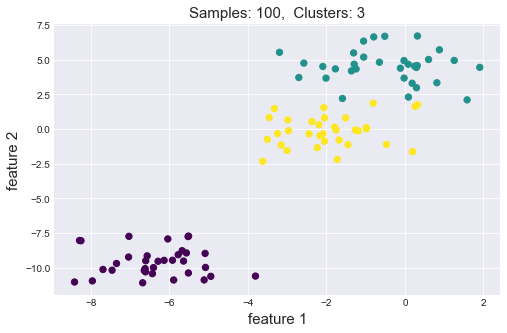

In [11]:
# Plot data
fig, ax = plt.subplots(1,1, figsize=(8, 5))
ax.scatter(X[:,0], X[:,1], c=y, marker='o', s=40, cmap=plt.cm.viridis)
ax.set_title('Samples: {},  Clusters: {}'.format(nsamples,nclust), fontsize=15) 
ax.set_xlabel('feature 1',fontsize=15) 
ax.set_ylabel('feature 2',fontsize=15) 
ax.grid()
plt.show()

Of course, **we do not know how data are labelled**. In fact, our task is 
to find the inner structure of the data, which is, in this case, the $3$ clusters. 
Let us plot the data without passing the $y$ vector of labels and using just one color.

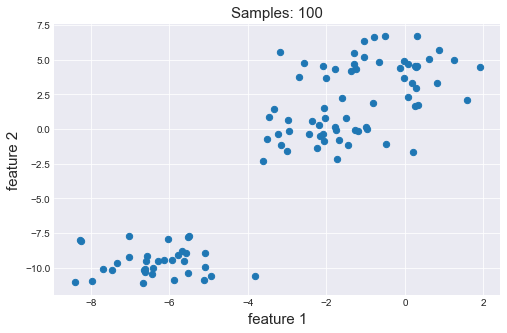

In [15]:
# Plot data
fig, ax = plt.subplots(1,1, figsize=(8, 5))
ax.scatter(X[:,0], X[:,1], marker='o', s=40, cmap=plt.cm.viridis)
ax.set_title('Samples: {}'.format(nsamples), fontsize=15) 
ax.set_xlabel('feature 1',fontsize=15) 
ax.set_ylabel('feature 2',fontsize=15) 
ax.grid()
plt.show()

## Finding cluster

The **K-Means** algorithm takes in input the number of cluster that shoud be eventually found in the data. In our case, is reasonable to give in input $3$ (at least $2$), as we see that data is divided in three parts (maybe two):

In [16]:
km = KMeans(n_clusters=3).fit(X)

**KMeans** returns **labels_** which is the array of labels of associated clusters:

In [17]:
km.labels_

array([1, 2, 0, 2, 1, 0, 1, 0, 0, 1, 2, 2, 1, 2, 1, 1, 1, 1, 0, 1, 2, 0,
       2, 1, 1, 2, 0, 1, 0, 0, 1, 2, 2, 2, 1, 0, 1, 2, 0, 1, 1, 1, 2, 2,
       2, 0, 2, 2, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 2, 2, 1, 1, 0, 0, 1, 2,
       2, 1, 0, 1, 2, 1, 1, 1, 2, 0, 2, 1, 0, 1, 2, 1, 1, 1, 2, 2, 2, 0,
       0, 0, 0, 0, 2, 2, 0, 2, 1, 2, 0, 0], dtype=int32)

and **cluster_centers_** which are the coordinates of the cluster centroids that have been found by the algorihtm:

In [18]:
km.cluster_centers_

array([[-0.44204087,  4.51257059],
       [-6.33926729, -9.59644494],
       [-1.98934259, -0.11142207]])

Let us visualise them:

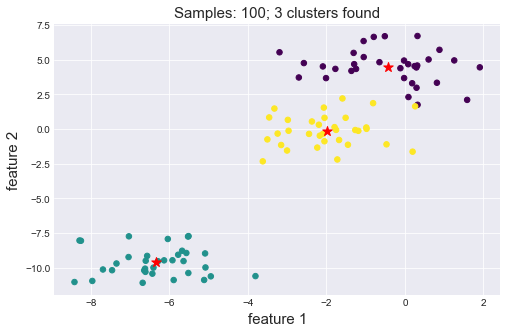

In [20]:
# Plot data
fig, ax = plt.subplots(1,1, figsize=(8, 5))
ax.scatter(X[:,0], X[:,1], c=km.labels_, marker='o', s=30, cmap=plt.cm.viridis)
ax.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker='*', s=100, color='red')
ax.set_title('Samples: {}; 3 clusters found'.format(nsamples), fontsize=15) 
ax.set_xlabel('feature 1',fontsize=15) 
ax.set_ylabel('feature 2',fontsize=15) 
ax.grid()
plt.show()

### Prediction

Given new instances, we can allocate them into the clusters that we have found.  

In [22]:
Xnew = np.array( [[-2.4,-7.4],[-0.1,0.1],[4.1,4.4]] )
pred = km.predict(Xnew)

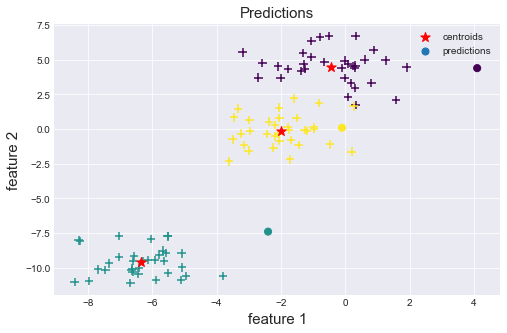

In [28]:
# Plot
fig, ax = plt.subplots(1,1, figsize=(8, 5))
ax.scatter(X[:,0], X[:,1], c=km.labels_, marker='+', s=70, cmap=plt.cm.viridis)
ax.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker='*', s=100, color='red', label="centroids")
ax.scatter(Xnew[:,0], Xnew[:,1], c=pred, marker='o', s=50, cmap=plt.cm.viridis, label="predictions")
ax.set_title('Predictions',fontsize=15) 
ax.set_xlabel('feature 1',fontsize=15) 
ax.set_ylabel('feature 2',fontsize=15) 
ax.legend()
ax.grid()
plt.show()

### Find more clusters

Let us see how *K-means* would split the data into a different number of clusters.

In [30]:
# Number of clusters to find
ks = [2,3,4,5,6,7]

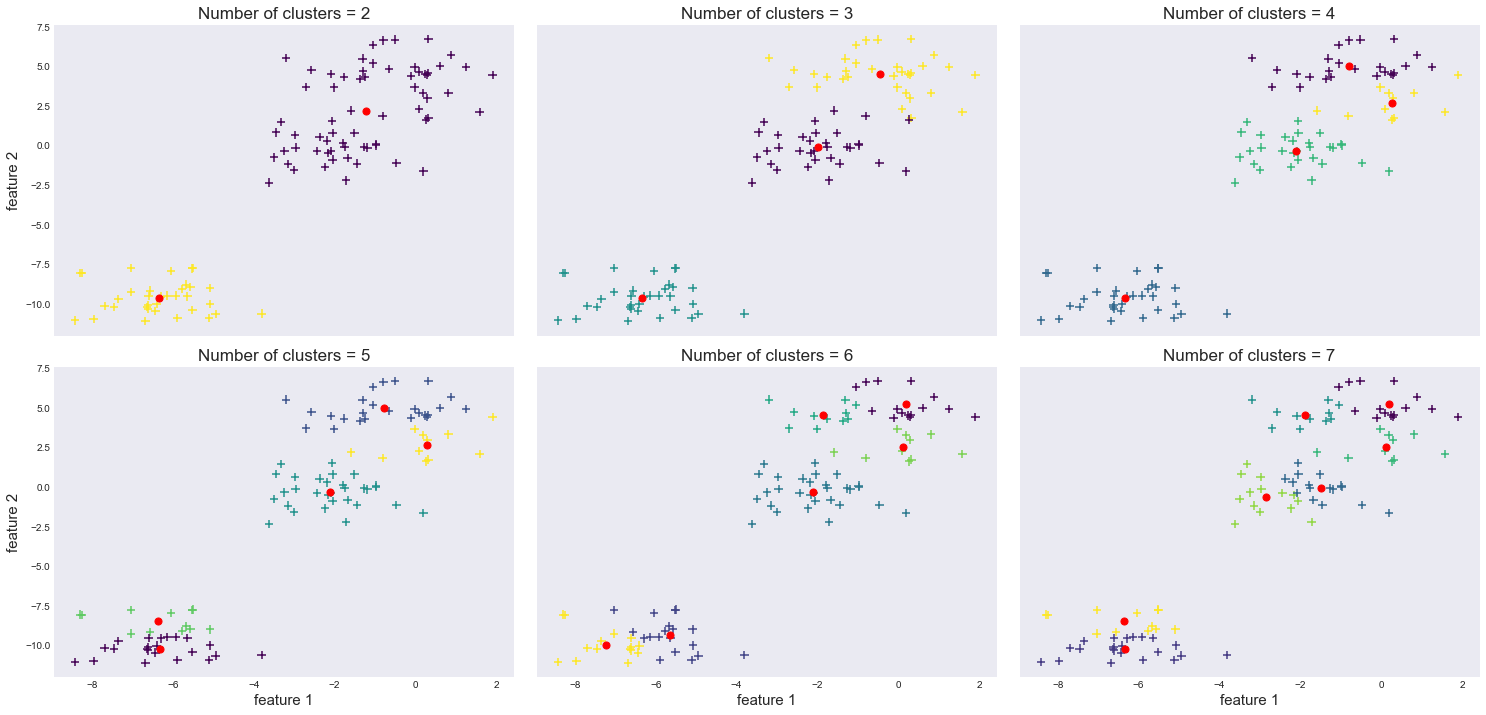

In [33]:
fig, ax = plt.subplots(2,3, figsize=(20, 12))
fig.subplots_adjust(left=0.01, right=1, hspace=0.1, wspace=0.05) 

ks = np.reshape(ks, (2,3))
for i in range(2):
    for j in range(3):
        
        # run k-means for current number of clusters
        km = KMeans(n_clusters=ks[i,j]).fit(X)
        
        # plot the result
        ax[i,j].scatter(X[:,0], X[:,1], c=km.labels_, marker='+', s=70, cmap=plt.cm.viridis)  
        ax[i,j].scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker='o', s=50, color='red')
        ax[i,j].set_title('Number of clusters = {}'.format(ks[i,j]), fontsize=17) 
        #ax[i,j].grid()
        if i==1: ax[i,j].set_xlabel('feature 1',fontsize=15)
        if i<1:  ax[i,j].set_xticks([])
        if j==0: ax[i,j].set_ylabel('feature 2',fontsize=15) 
        if j>0:  ax[i,j].set_yticks([])
    #endfor
#endfor

## Inertia
The **inertia** is defined as the total sum of squared distances of samples to their closest cluster centroids and it 
is nothing the objective function (**loss function**) that is minimized by the K-means. 

Let $K$ be the number of clusters and $\mu_{(i)}$ be the $i$th cluster centroid. Then, the inertia is:

J := \sum_{i=1}^K \left(\sum_{x \in C_i} ||x - \mu^{(i)} ||^2 \right) 
$$

The plot of the inertia for different number of clusters of the same dataset is often referred to as *elbow plot*.

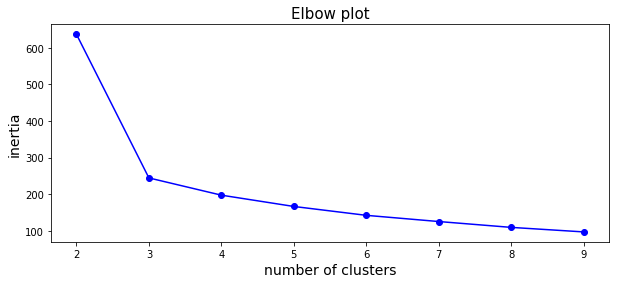

In [172]:
# Number of clusters to find
ks = range(2,10)

ssd = []
for k in ks:
    km = KMeans(n_clusters=k).fit(X)
    ssd.append(km.inertia_)
#endfor

# Plot inertia
fig, ax = plt.subplots(1,1, figsize=(10, 4))
ax.plot(ks, ssd, 'b-o')
ax.set_title('Elbow plot',fontsize=15) 
ax.set_ylabel('inertia',fontsize=14) 
ax.set_xlabel('number of clusters',fontsize=14) 

plt.show()

The name *elbow plot* arises from the shape of the inertia curve. We see that there is a large drop when passing 
from $2$ clusters to $3$ clusters, and then eventually a very slow decrease in magnitude from more than three clusters. 

This eventually suggests that $k=3$ was the most likely probable choice for the number of clusters to choose 
for te given dataset.

## Rescaling the data

Usually, the original ataset requires some kind of normalisation. This is needed, in particular, when the range of one feature is much larger than the range of another feature. This is a common requirement of machine learning methods to avoid the features with large values weight too much on the final model. 

Let us see how such a kind of dataset may affect K-means.

In [173]:
# Get synthetic data
nclust    = 3
nsamples  = 100
nfeatures = 2
X, y = make_blobs(n_samples = nsamples, n_features = nfeatures, centers = nclust, cluster_std = 1.2, random_state = 11)

We artificially modify the second feature of the dataset

In [174]:
# Now artificially modify the second features
X[y==0,1] = 60  * X[y==0,1] 
X[y==1,1] = 400 * X[y==1,1] 
X[y==2,1] = 250 * X[y==2,1] 

Feature 1 range: [-8.416, 1.907]
Feature 2 range: [-665.359, 2685.727]
Mean: [ -2.95770742 391.38310401]
Var:  [7.48534251e+00 1.14074082e+06]


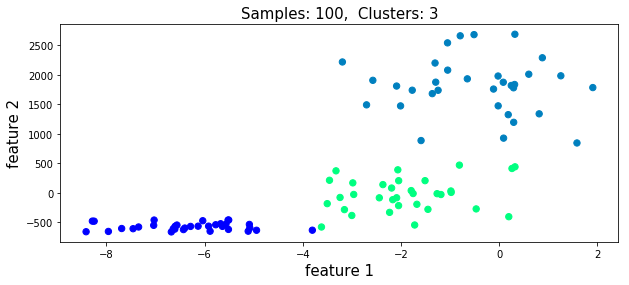

In [175]:
# Compute the mean and variance of the data
print('Feature 1 range: [{:.3f}, {:.3f}]'.format(np.min(X[:,0]), np.max(X[:,0])) )
print('Feature 2 range: [{:.3f}, {:.3f}]'.format(np.min(X[:,1]), np.max(X[:,1])) )
print('Mean: {}'.format( np.mean(X, axis=0) ) )
print('Var:  {}'.format( np.var(X, axis=0) )  )

# Plot data
fig, ax = plt.subplots(1,1, figsize=(10, 4))
ax.scatter(X[:,0], X[:,1], c=y, marker='o', s=40, cmap=plt.cm.winter) #, edgecolor='black')
ax.set_title('Samples: {},  Clusters: {}'.format(nsamples,nclust), fontsize=15) 
ax.set_xlabel('feature 1',fontsize=15) 
ax.set_ylabel('feature 2',fontsize=15) 
plt.show()


In [176]:
# Run the K-means algorithm 
km_original = KMeans(n_clusters=3).fit(X)

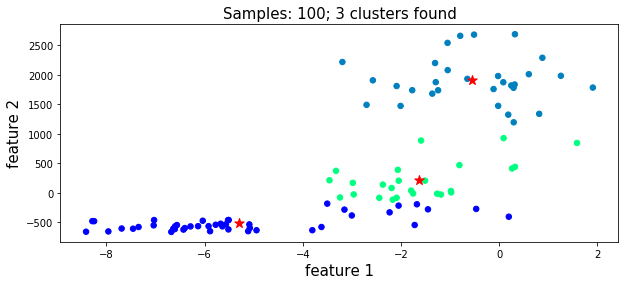

In [177]:
# Plot data
fig, ax = plt.subplots(1,1, figsize=(10, 4))
ax.scatter(X[:,0], X[:,1], c=km_original.labels_, marker='o', s=30, cmap=plt.cm.winter)
ax.scatter(km_original.cluster_centers_[:,0], km_original.cluster_centers_[:,1], marker='*', s=100, color='red')
ax.set_title('Samples: {}; 3 clusters found'.format(nsamples), fontsize=15) 
ax.set_xlabel('feature 1',fontsize=15) 
ax.set_ylabel('feature 2',fontsize=15) 
plt.show()

We see that the *K-means* does not find the **true** clusters of the dataset. 

Note that **we know** here what are the clusters, but in generally we don't. 
This is just to show the importance of scaling data before applying machine learning algorithms.

Let us perform two type of scaling, **standard scaling** and **min-max scaling**. 

In the **standard scaling** scaling we take the data, subtract the mean, and divide by standard deviation:
$$
X_{\text{std-scaled}} := \frac{X - \mu}{\sigma}, 
$$
where $\mu$ is the empirical mean of $X$ and $\sigma$ is the empirical standard deviation,
$$
\mu := \frac{1}{n}\sum_{i=1}^n X_i
\quad \text{and} \quad 
\sigma := \left( \frac{1}{n}\sum_{i=1}^m (X_i - \mu)^2 \right)^2.
$$
The scaled data $X_{\text{std-scaled}} $ has mean $0$ and variance $1$.

In the **min-max scaling**, the data scaled so that the new range (of each feature) is $[0,1]$:
$$
X_{\text{mm-scaled}} := \frac{X_i - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}  },
$$
where $X_{\text{min}}$ and $X_{\text{max}}$ denote the minimum and the maximum of the data $X$, respectively. 

In [4]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [179]:
# Standard scaling
std_scaled_X = StandardScaler().fit_transform(X)

# MinMax scaling
mm_scaled_X = MinMaxScaler().fit_transform(X)

Standard Scaling:
 - feature 1 range: [-1.995, 1.778]
 - feature 2 range: [-0.989, 2.148]
 - mean: [-1.07691633e-16  1.11022302e-16]
 - var:  [1. 1.]

MinMax Scaling:
 - feature 1 range: [0.000, 1.000]
 - feature 2 range: [0.000, 1.000]
 - mean: [0.52875017 0.31534314]
 - var:  [0.07025422 0.10158183]


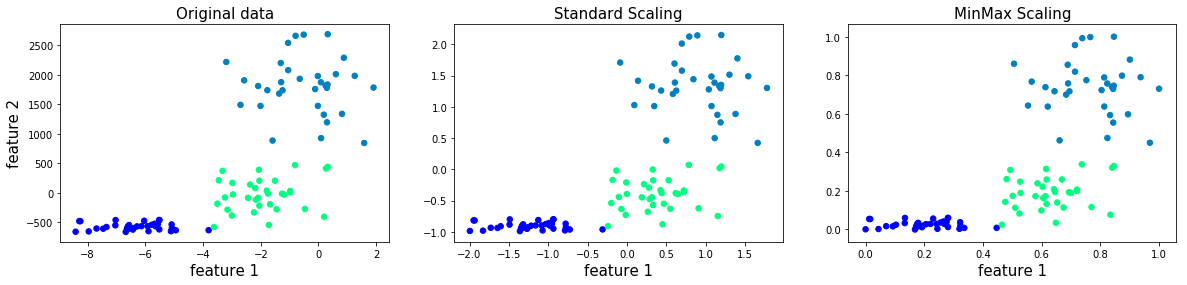

In [180]:
# Compute the mean and variance of the data
print('Standard Scaling:')
print(' - feature 1 range: [{:.3f}, {:.3f}]'.format(np.min(std_scaled_X[:,0]), np.max(std_scaled_X[:,0])) )
print(' - feature 2 range: [{:.3f}, {:.3f}]'.format(np.min(std_scaled_X[:,1]), np.max(std_scaled_X[:,1])) )
print(' - mean: {}'.format( np.mean(std_scaled_X, axis=0) ) )
print(' - var:  {}\n'.format( np.var(std_scaled_X, axis=0) )  )

print('MinMax Scaling:')
print(' - feature 1 range: [{:.3f}, {:.3f}]'.format(np.min(mm_scaled_X[:,0]), np.max(mm_scaled_X[:,0])) )
print(' - feature 2 range: [{:.3f}, {:.3f}]'.format(np.min(mm_scaled_X[:,1]), np.max(mm_scaled_X[:,1])) )
print(' - mean: {}'.format( np.mean(mm_scaled_X, axis=0) ) )
print(' - var:  {}'.format( np.var(mm_scaled_X, axis=0) )  )

# Plot the scaled data
fig, ax = plt.subplots(1,3, figsize=(20, 4))
ax = ax.flatten()
for j in range(3):
    if j==0: 
        data = X
        ax[j].set_title('Original data', fontsize=15) 
    elif j==1:
        data = std_scaled_X
        ax[j].set_title('Standard Scaling', fontsize=15) 
    else:
        data = mm_scaled_X
        ax[j].set_title('MinMax Scaling', fontsize=15) 
    #endif
    ax[j].scatter(data[:,0], data[:,1], c=y, marker='o', s=30, cmap=plt.cm.winter)
    #ax.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker='*', s=100, color='red')
    ax[j].set_ylabel('feature 2',fontsize=15)  
    ax[j].set_xlabel('feature 1',fontsize=15) 
    if j>0: 
        ax[j].set_ylabel('')
    #endif
#endfor

Let us run again K-means with the scaled data

In [181]:
# K-means for data scaled with standard scaling
km_std = KMeans(n_clusters=3).fit(std_scaled_X)

# K-means for data scaled with minmax scaling
km_mm = KMeans(n_clusters=3).fit(mm_scaled_X)

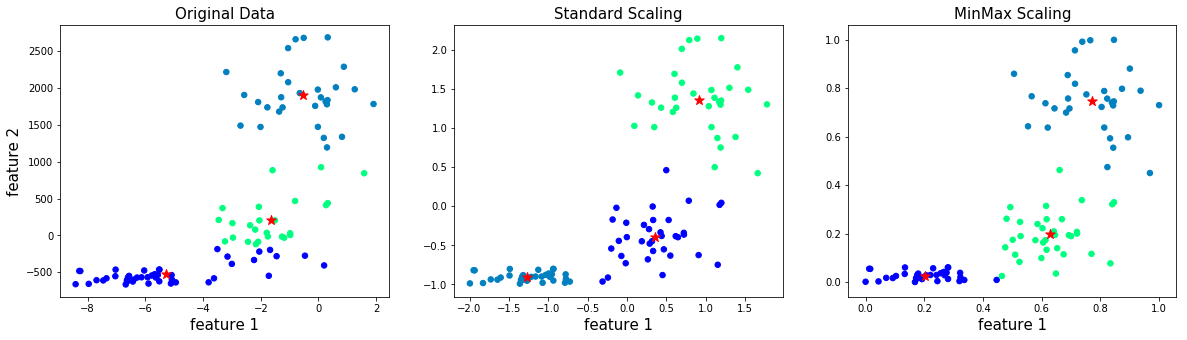

In [182]:
# Plot the result 
fig, ax = plt.subplots(1,3, figsize=(20, 5))
ax = ax.flatten()
for j in range(3):
    if j==0:
        data = X
        centers = km_original.cluster_centers_
        labels = km_original.labels_
        ax[j].set_title('Original Data', fontsize=15) 
    elif j==1: 
        data = std_scaled_X
        centers = km_std.cluster_centers_
        labels = km_std.labels_
        ax[j].set_title('Standard Scaling', fontsize=15) 
    else:
        data = mm_scaled_X
        centers = km_mm.cluster_centers_
        labels = km_mm.labels_
        ax[j].set_title('MinMax Scaling', fontsize=15) 
    #endif
    ax[j].scatter(data[:,0], data[:,1], c=labels, marker='o', s=30, cmap=plt.cm.winter)
    ax[j].scatter(centers[:,0], centers[:,1], marker='*', s=100, color='red')
    ax[j].set_ylabel('feature 2',fontsize=15)  
    ax[j].set_xlabel('feature 1',fontsize=15) 
    if j>0: 
        ax[j].set_ylabel('')
    #endif
#endfor

We see that the *K-means* using both standard *scaling* and *min-max* scaling returns more appropriate clusters.

## K-means of datasets with more than two features

In [5]:
# Importing the dataset cars.csv from Kaggle
# Source: https://www.kaggle.com/abineshkumark/carsdata/version/1
cars = pd.read_csv('csv/cars.csv')
cars.columns

Index(['mpg', ' cylinders', ' cubicinches', ' hp', ' weightlbs', ' time-to-60',
       ' year', ' brand'],
      dtype='object')

A bit of data cleaning: 

In [6]:
# Renaming columns properly (some of them come with a white space)
cars.columns=['mpg','cylinders','cubicinches','hp','weightlbs','time-to-60','year','brand']
cars.head(15)

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.
5,23.0,8,350,125,3900,17,1980,US.
6,13.0,8,351,158,4363,13,1974,US.
7,14.0,8,440,215,4312,9,1971,US.
8,25.4,5,183,77,3530,20,1980,Europe.
9,37.7,4,89,62,2050,17,1982,Japan.


In [7]:
# There may be some missing value which are simply empty string.
# The following looks for NaN or None values, hence the empty string in line 14 is not considered 
# a missing value and False is returned
cars.drop(columns='brand').isnull().values.any()

False

In [13]:
# Let us convert every entry of the DataFrame to numeric, so that empty strings bocome Nan
for col in cars.columns[:-1]:
    cars[col] = pd.to_numeric(cars[col], errors='coerce') # coerce is the option to return Nan
#endfor 

# Double check line 14:
cars.loc[14]

mpg            19.1
cylinders         6
cubicinches     225
hp               90
weightlbs       NaN
time-to-60       19
year           1981
brand           US.
Name: 14, dtype: object

In [14]:
# Now we can look for Nan values
print('Number of Nan in each column:')
colnan = cars.drop(columns='brand').isnull().sum() 
print(colnan)
print('----------------')
print('* total Nan:   {}'.format(colnan.sum()))

Number of Nan in each column:
mpg            0
cylinders      0
cubicinches    2
hp             0
weightlbs      3
time-to-60     0
year           0
dtype: int64
----------------
* total Nan:   5


In [15]:
# Finally remove rows with Nan values
cars = cars.dropna()

# and save data without brand columns
X = cars.drop(columns='brand').values

#### Rescaling data


In [16]:
# Standard scaling
Xscaled = MinMaxScaler().fit_transform(X)

Xscaled = pd.DataFrame(data=Xscaled, columns=cars.columns[:-1])

#### K-means and elbow plot

In [18]:
ks = np.arange(1,10)

inertias = []
for k in ks:
    kmeans = KMeans(n_clusters=k).fit(Xscaled)
    inertias.append(kmeans.inertia_)
#endfor

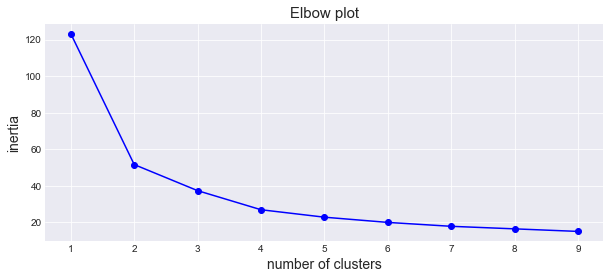

In [19]:
# using seaborn style (type plt.style.available to see available styles)
plt.style.use("seaborn-dark") 

# Plot inertia
fig, ax = plt.subplots(1,1, figsize=(10, 4))
ax.plot(ks, inertias, 'b-o')
ax.set_title('Elbow plot',fontsize=15) 
ax.set_ylabel('inertia',fontsize=14) 
ax.set_xlabel('number of clusters',fontsize=14) 
ax.grid();
plt.show()

We may think that $2$ clusters is the "optimal" choice, although we know that there is no "optimal" choice of clusters (unless the answer is known, as in our case)  

In [23]:
# Let us choose 3 clusters
nclusters = 3
km = KMeans(n_clusters=3).fit(Xscaled)

In [24]:
# Set of colors, features, and markers
colors   = ['#DB3D3D','#3D9CDB','#1CEC92']   
markers  = ['.','x','+']

# Plotting data function
def plotdata(ax,df,klabel,nclusters,colors,markers,cenclust):
    for n in range(nclusters):  
        ax.scatter(df.iloc[klabel==n, 0], df.iloc[klabel==n, 1], c=colors[n], marker=markers[n], s=100)
    #endfor
    if cenclust is not None:
        ax.scatter(cenclust[:,0], cenclust[:,1], color='black', marker='*', s=170)
    #endif 
#endfunction

# Pairplot function
def pairplot(df,klabel,nclusters,colors,markers,*args,**kwargs):
    # Optional parameter
    centr = kwargs.get('centr',None)
    
    # number of features
    n = len(df.columns) - 1
    
    fig, ax = plt.subplots(n, n, figsize=(20, 20))
    fig.subplots_adjust(left=0.01, right=1, bottom=0, top=1,hspace=0.05, wspace=0.05)
    for i in range(n):
        for j in range(n):        
            if j <= i:
                if centr is not None:
                    plotdata(ax[i,j],df.iloc[:,[j,i+1]],klabel,nclusters,colors,markers,cenclust=centr[:,[j,i+1]])        
                else:
                    plotdata(ax[i,j],df.iloc[:,[j,i+1]],klabel,nclusters,colors,markers,cenclust=None)        
                #endif    
                if i == n-1: ax[i,j].set_xlabel(df.columns[j],fontsize=18)
                if j == 0:   ax[i,j].set_ylabel(df.columns[i+1],fontsize=18)
                if j > 0:    ax[i,j].set_yticks([])
                if i < n-1:  ax[i,j].set_xticks([])  
            else:
                ax[i,j].set_visible(False)
            #endif
        #endfor
    #endfor
#endfunction

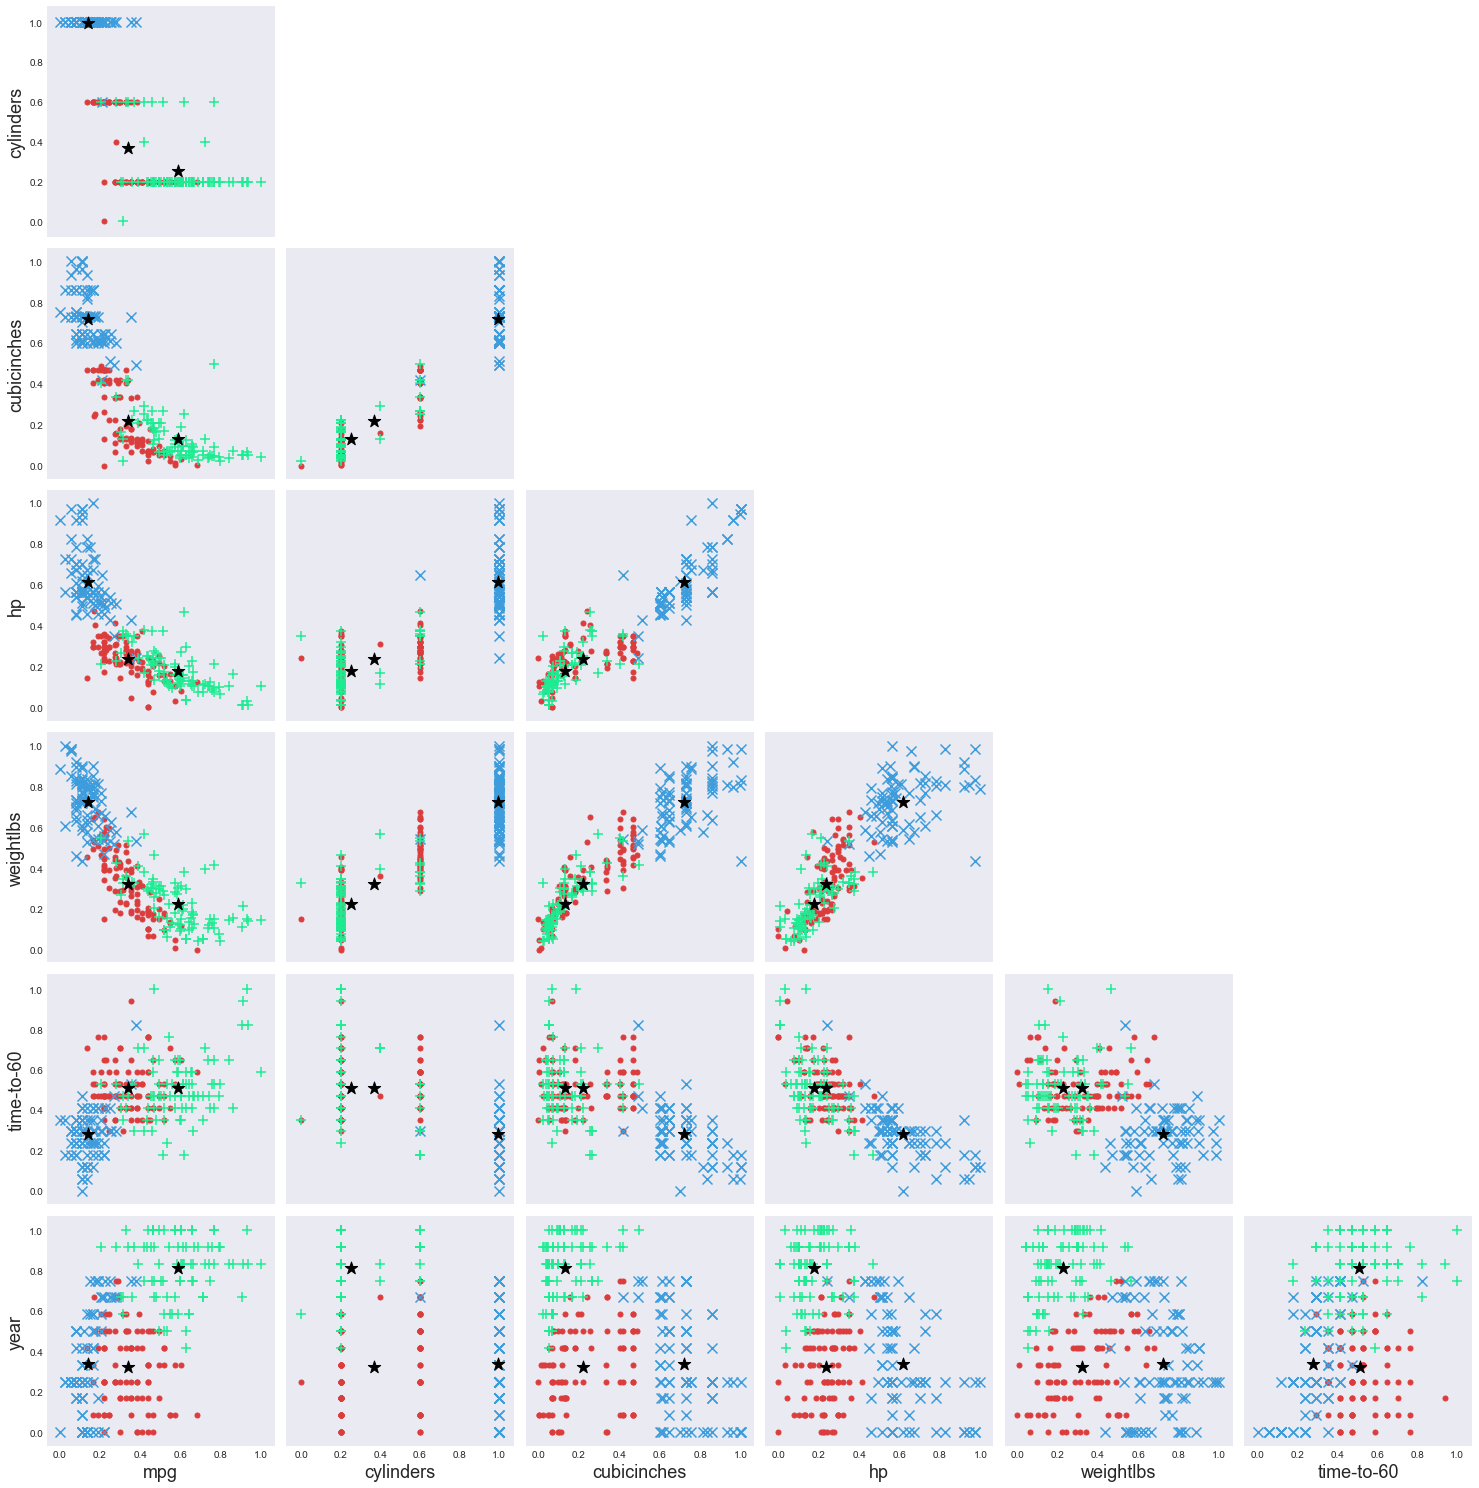

In [25]:
# Plot clusters
pairplot(Xscaled,km.labels_,nclusters,colors,markers,centr=km.cluster_centers_)